# Imports

In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sys.path.insert(1, '/kaggle/input/medicall')
from Config.util import *

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Dataset

In [4]:
data = pd.read_csv('Datasets/medical_costs.csv')
data.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [5]:
target_col_name = 'Medical Cost'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [7]:
print(data['Sex'].unique())
print(data['Children'].unique())
print(data['Smoker'].unique())
print(data['Region'].unique())

['male' 'female']
[2 0 5 1 3 4]
['yes' 'no']
['northwest' 'northeast' 'southeast' 'southwest']


In [8]:
object_cols = data.select_dtypes(include='object').columns.to_list()
for col in object_cols:
    print(f"{col} is{'' if is_consumption(data, col, target_col_name, 0.5) else ' not'} a consumption column")

Sex is not a consumption column
Smoker is not a consumption column
Region is not a consumption column


In [9]:
data = pd.get_dummies(data, columns=object_cols)
data.head()

,Age,BMI,Children,Medical Cost,Sex_female,Sex_male,Smoker_no,Smoker_yes,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,58,15.6,2,17907.54,False,True,False,True,False,True,False,False
1,24,29.8,0,16312.64,False,True,False,True,True,False,False,False
2,50,29.0,5,6819.21,False,True,True,False,False,True,False,False
3,35,34.0,1,5247.87,False,True,True,False,False,False,True,False
4,31,17.6,3,17525.49,True,False,False,True,False,False,True,False


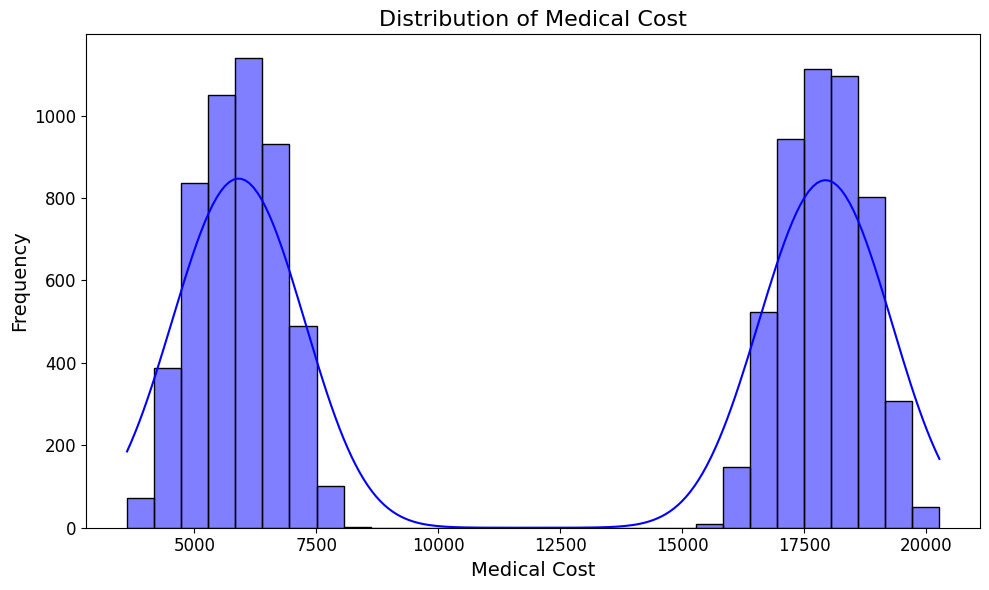

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data[target_col_name], kde=True, color='blue', bins=30)
plt.title(f"Distribution of {target_col_name}", fontsize=16)
plt.xlabel(target_col_name, fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

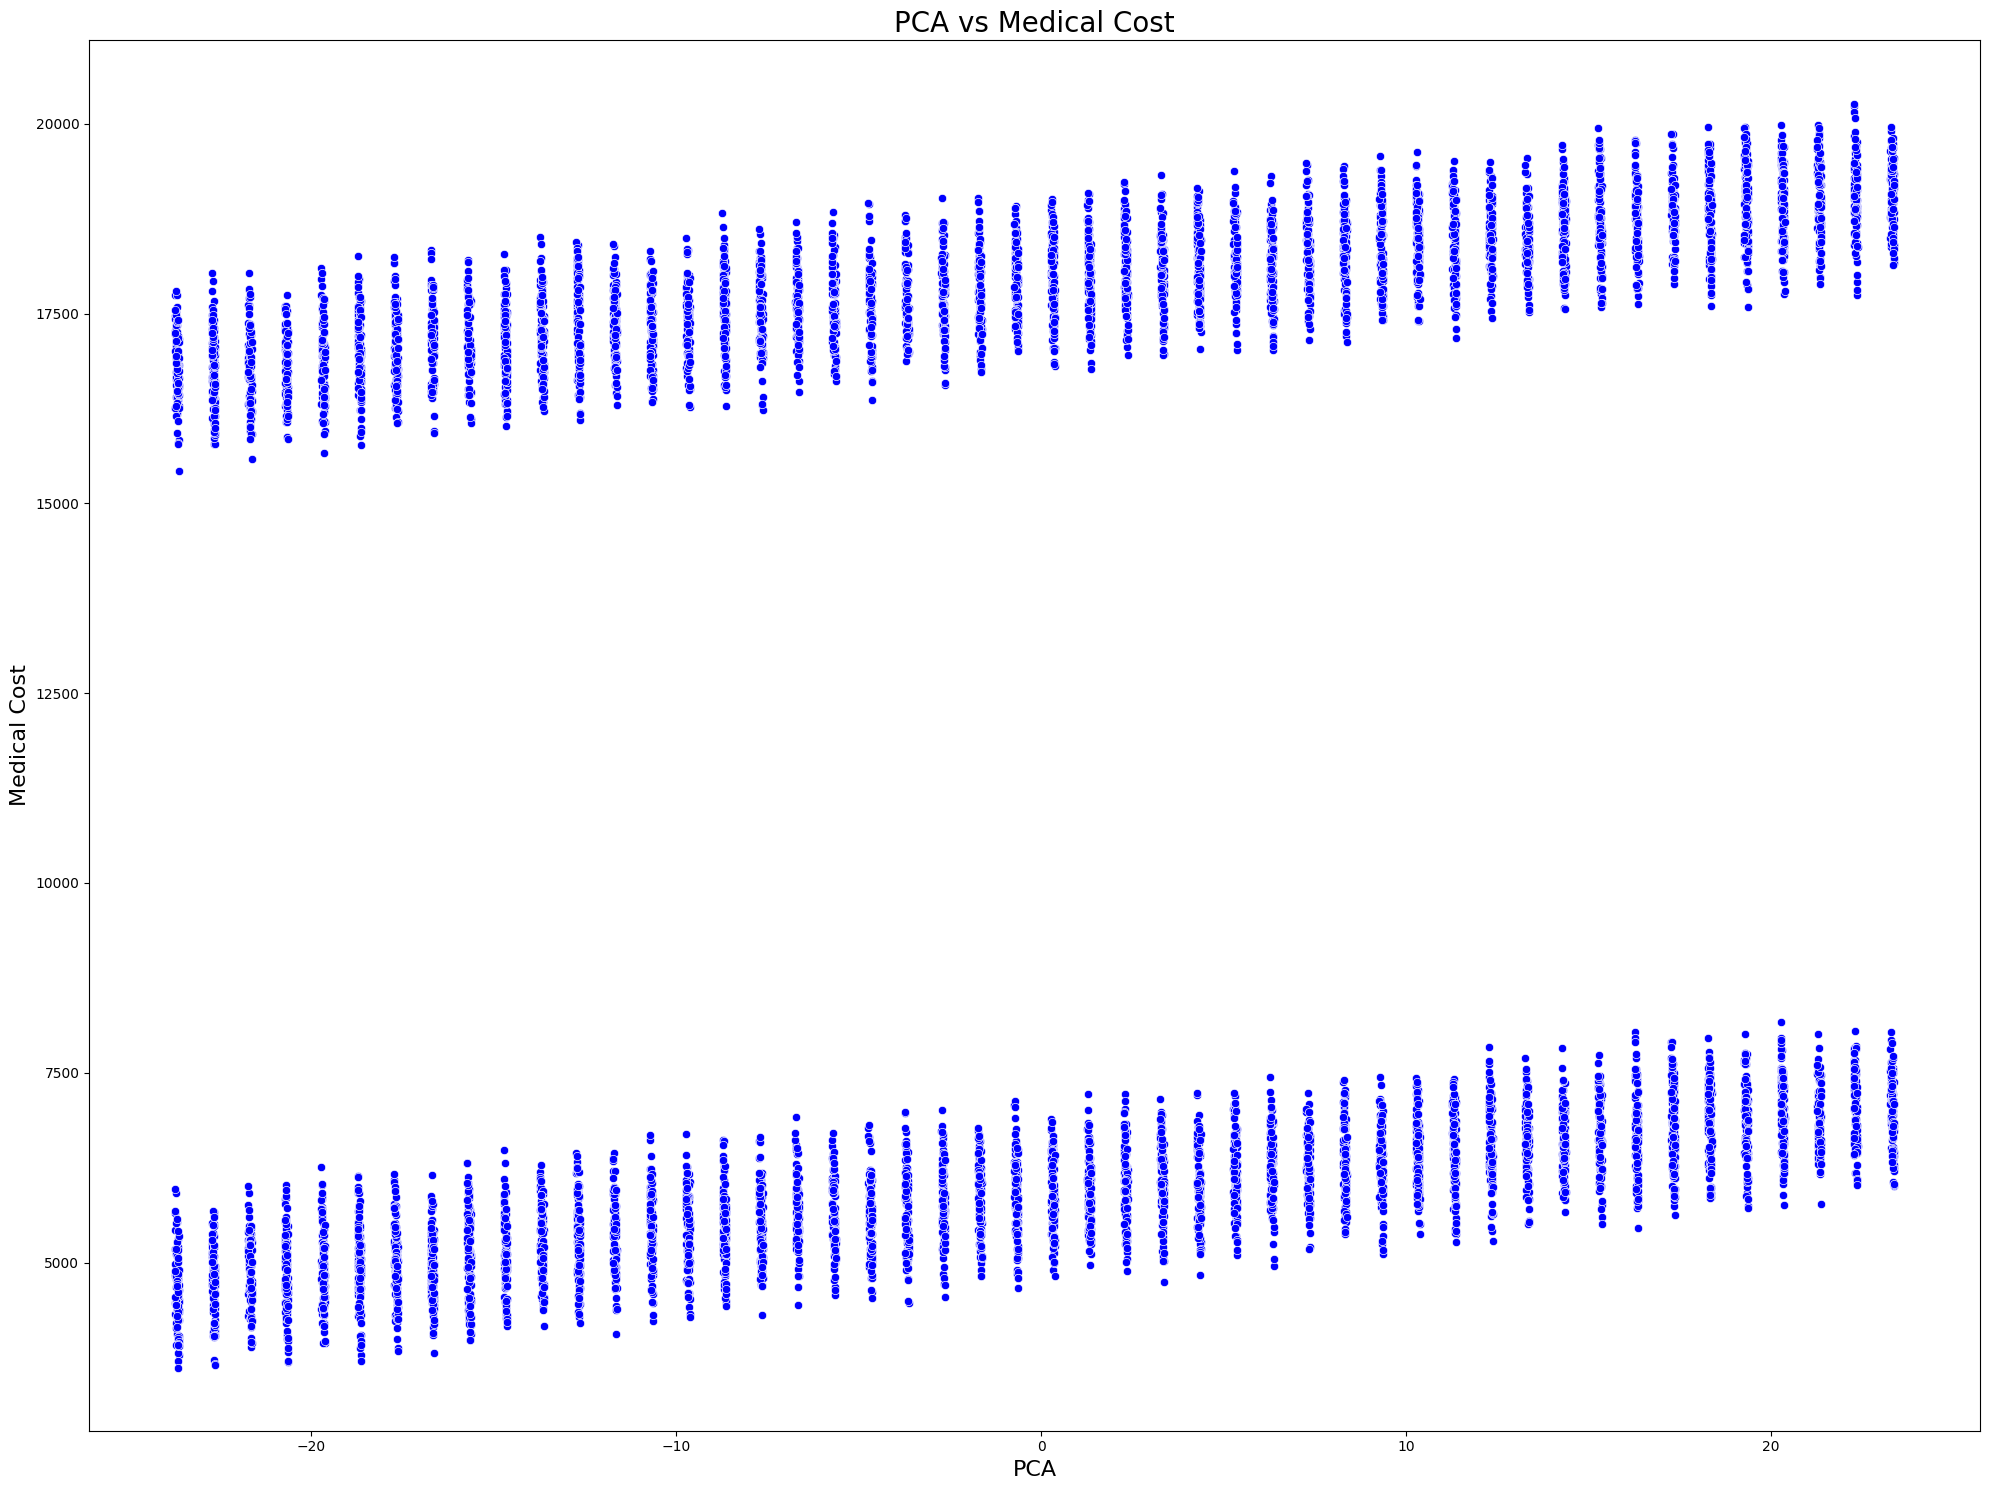

In [11]:
data_copy = data.copy()
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data_copy.drop(columns=[target_col_name]))
data_copy['PCA'] = pca_result[:, 0]

fig, axe = plt.subplots(figsize=(20, 15))

sns.scatterplot(x='PCA', y=target_col_name, data=data_copy, ax=axe, color='b')
axe.set_title(f'PCA vs {target_col_name}', fontsize=20)
axe.set_xlabel('PCA', fontsize=16)
axe.set_ylabel(target_col_name, fontsize=16)

plt.tight_layout()
plt.show()

As we can see there are 2 completely separate parts of medical cost, and this will cause problems in the PCA values. In order to fix this, we will separate the analysis into two subsets of this dataframe and continue.

In [12]:
data1 = data[data['Medical Cost'] < 11000]
data2 = data[data['Medical Cost'] > 11000]

# PCA

In [13]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data1.drop(columns=[target_col_name]))
data1['PCA'] = pca_result[:, 0]

pca = PCA(n_components=1)
pca_result = pca.fit_transform(data2.drop(columns=[target_col_name]))
data2['PCA'] = pca_result[:, 0]

/var/folders/dn/jj_tz7717dz0k33tbysb91gh0000gn/T/ipykernel_21637/2668551174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['PCA'] = pca_result[:, 0]
/var/folders/dn/jj_tz7717dz0k33tbysb91gh0000gn/T/ipykernel_21637/2668551174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['PCA'] = pca_result[:, 0]


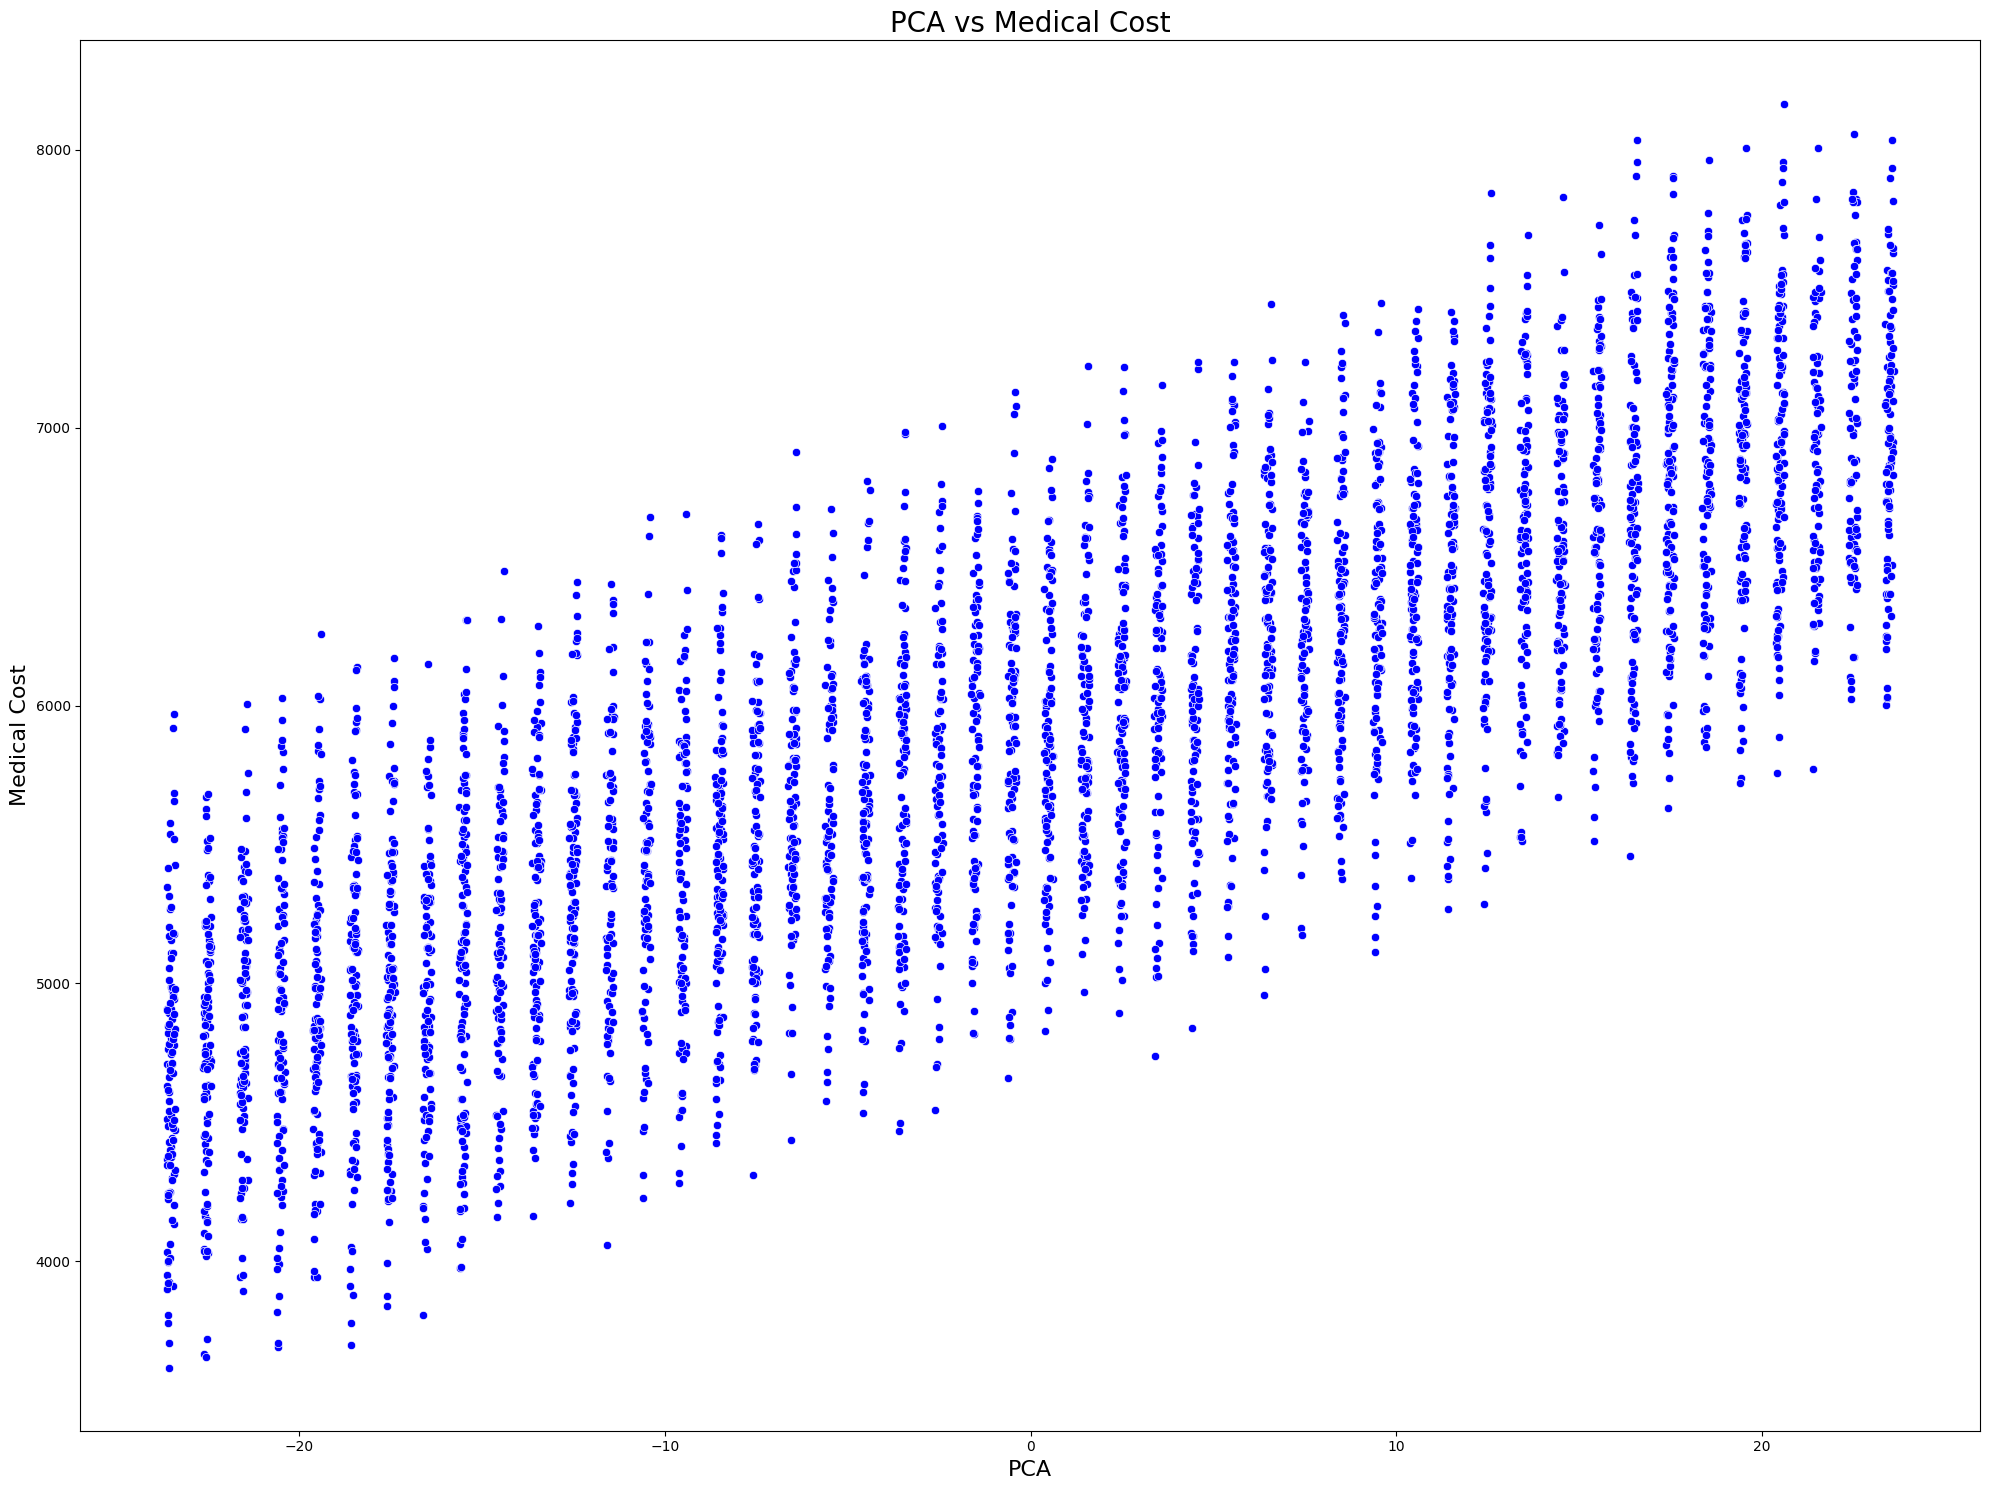

In [14]:
fig, axe = plt.subplots(figsize=(20, 15))

sns.scatterplot(x='PCA', y=target_col_name, data=data1, ax=axe, color='b')
axe.set_title(f'PCA vs {target_col_name}', fontsize=20)
axe.set_xlabel('PCA', fontsize=16)
axe.set_ylabel(target_col_name, fontsize=16)

plt.tight_layout()
plt.show()

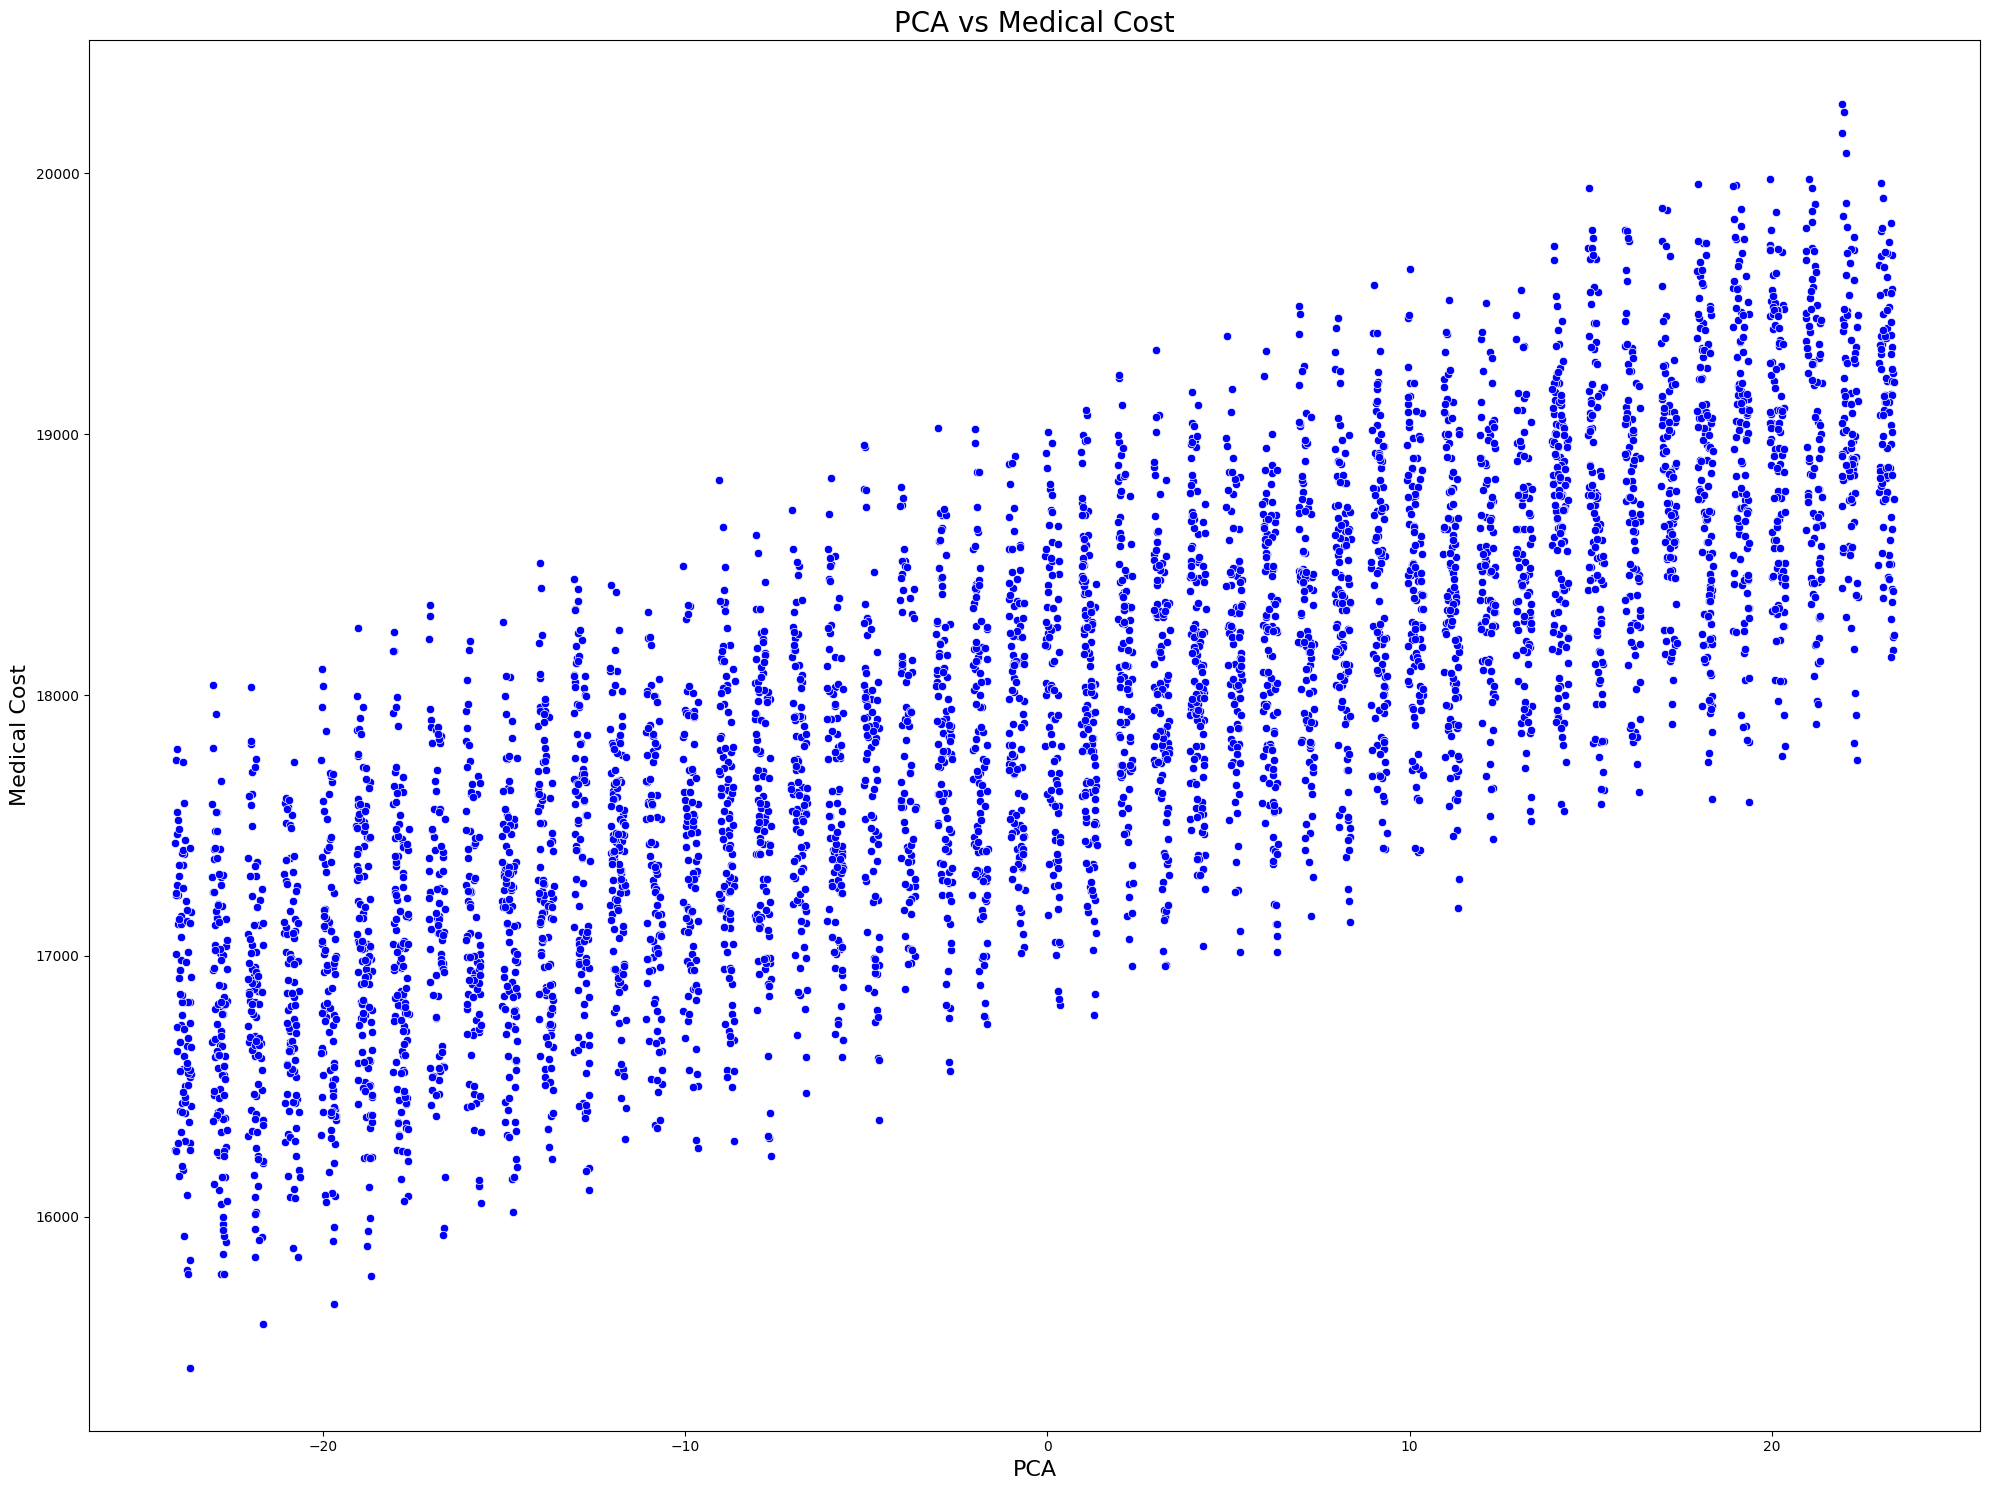

In [15]:
fig, axe = plt.subplots(figsize=(20, 15))

sns.scatterplot(x='PCA', y=target_col_name, data=data2, ax=axe, color='b')
axe.set_title(f'PCA vs {target_col_name}', fontsize=20)
axe.set_xlabel('PCA', fontsize=16)
axe.set_ylabel(target_col_name, fontsize=16)

plt.tight_layout()
plt.show()

In [16]:
data1.reset_index(inplace=True, drop=True)
data2.reset_index(inplace=True, drop=True)

In [17]:
# data1['PCA'] = data1['PCA'].max() - data1['PCA']
# data2['PCA'] = data2['PCA'].max() - data2['PCA']

# Training

We will firstly apply the faramework to the first subset and then the second one.

In [18]:
test_pairs1 = generate_random_pairs(data1, 20000)
test_df1 = create_pair_df(data1, test_pairs1, target_col_name)

In [19]:
tree_depth1 = int(np.round(np.sqrt(len(data1.columns))))

In [28]:
mf11 = train_evaluate_repeat(generate_random_pairs, data1, num_samples=200000, depth=tree_depth1, test_df=test_df1, use_bradley=True, exp=False, add_noise=False, noise=0.1, label_col=target_col_name, repeats=1)

100%|██████████| 1/1 [05:53<00:00, 353.64s/it]

Mean Accuracy: 0.7271
Mean Precision: 0.7333940866747671
Mean Recall: 0.7194080254270957
Mean F1 Score: 0.7263337344564782


In [29]:
var, residuals = calculate_pca_var(data1, target_col_name)
print(var)

723100.8051759915


In [30]:
# Calculating the number of pairs
max_pairs = len(data1) * 10
alpha = 1e-5

num_pairs = int(max_pairs / (1 + alpha * var))
print(num_pairs)

6084


In [31]:
pretrain_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': tree_depth1
}
pretrained_model1 = pretrain_model_with_residuals(df=data1, n_samples=num_pairs, pretrain_params=pretrain_params, target_col=target_col_name, residuals=residuals)

In [32]:
step = 50
num_samples = 800
repeats = 40

f1_scores_UB_repeats = []
f1_scores_UP_repeats = []
f1_scores_RB_repeats = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data1,
        test_df=test_df1,
        pretrain_params=pretrain_params,
        pretrained_model=pretrained_model1,
        target_col=target_col_name,
        use_bradley=True,
        exp=False,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats.append(f1_scores_UB)
    f1_scores_UP_repeats.append(f1_scores_UP)
    f1_scores_RB_repeats.append(f1_scores_RB)

# Compute the average F1 scores across repeats
average_f1_scores_UB = np.mean(f1_scores_UB_repeats, axis=0)
average_f1_scores_UP = np.mean(f1_scores_UP_repeats, axis=0)
average_f1_scores_RB = np.mean(f1_scores_RB_repeats, axis=0)

Blank model with random pairs: 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]


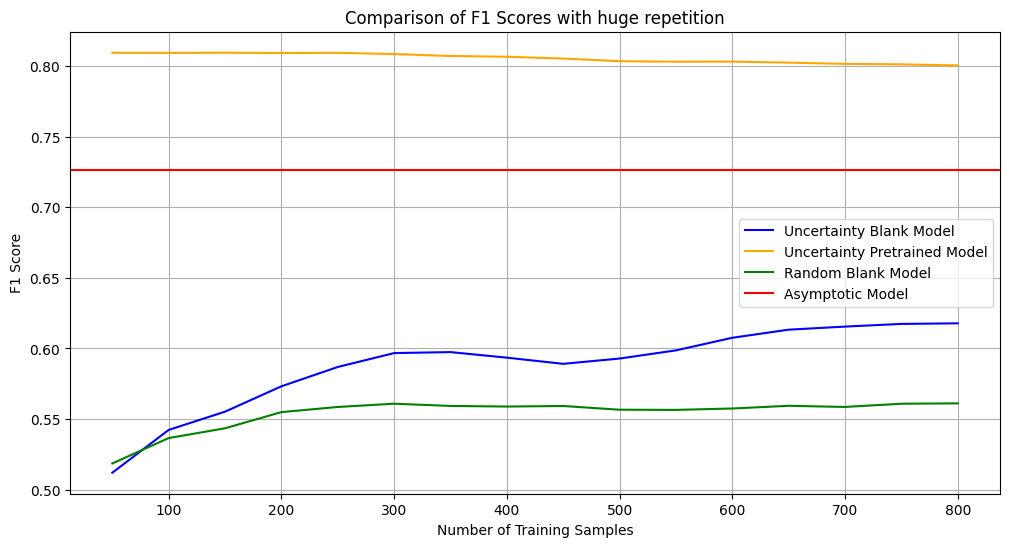

In [33]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB, label='Random Blank Model', color='green')
plt.axhline(y = mf11, color = 'r', linestyle = '-', label='Asymptotic Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with huge repetition')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
step = 50
num_samples = 10000
repeats = 1

f1_scores_UB_repeats2 = []
f1_scores_UP_repeats2 = []
f1_scores_RB_repeats2 = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data1,
        test_df=test_df1,
        pretrain_params=pretrain_params,
        pretrained_model=pretrained_model1,
        target_col=target_col_name,
        use_bradley=True,
        exp=False,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats2.append(f1_scores_UB)
    f1_scores_UP_repeats2.append(f1_scores_UP)
    f1_scores_RB_repeats2.append(f1_scores_RB)

# Compute the average F1 scores across repeats
average_f1_scores_UB2 = np.mean(f1_scores_UB_repeats2, axis=0)
average_f1_scores_UP2 = np.mean(f1_scores_UP_repeats2, axis=0)
average_f1_scores_RB2 = np.mean(f1_scores_RB_repeats2, axis=0)

Blank model with random pairs: 100%|██████████| 200/200 [02:14<00:00,  1.48it/s]


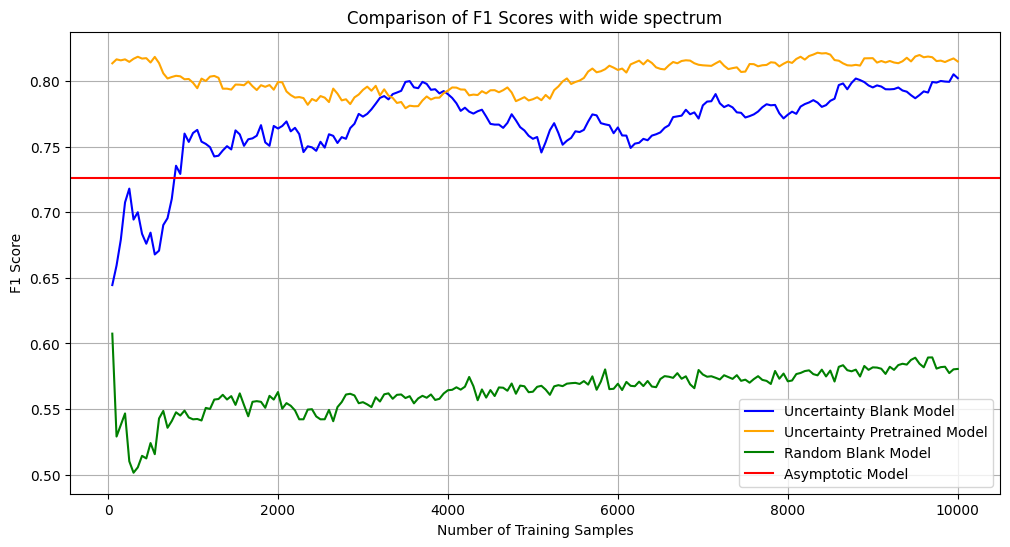

In [35]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB2, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP2, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB2, label='Random Blank Model', color='green')
plt.axhline(y = mf11, color = 'r', linestyle = '-', label='Asymptotic Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with wide spectrum')
plt.legend()
plt.grid(True)
plt.show()

Now the second subset

In [18]:
test_pairs2 = generate_random_pairs(data2, 20000)
test_df2 = create_pair_df(data2, test_pairs2, target_col_name)

In [19]:
tree_depth2 = int(np.round(np.sqrt(len(data2.columns))))

In [23]:
mf12 = train_evaluate_repeat(generate_random_pairs, data2, num_samples=200000, depth=tree_depth2, test_df=test_df2, use_bradley=True, exp=False, add_noise=False, noise=0.1, label_col=target_col_name, repeats=1)

100%|██████████| 1/1 [01:01<00:00, 61.38s/it]

Mean Accuracy: 0.59195
Mean Precision: 0.5965569620253165
Mean Recall: 0.5851211760031784
Mean F1 Score: 0.5907837336408766


In [21]:
var, residuals = calculate_pca_var(data2, target_col_name)
print(var)

724300.5448501004


In [24]:
len(data2)

4992

In [27]:
# Calculating the number of pairs
max_pairs = len(data2) * 25
alpha = 1e-5

num_pairs = int(max_pairs / (1 + alpha * var))
print(num_pairs)

15140


In [28]:
pretrain_params2 = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': tree_depth2
}

In [29]:
pretrained_model2 = pretrain_model_with_residuals(df=data2, n_samples=num_pairs, pretrain_params=pretrain_params2, target_col=target_col_name, residuals=residuals)

In [30]:
step = 50
num_samples = 800
repeats = 40

f1_scores_UB_repeats = []
f1_scores_UP_repeats = []
f1_scores_RB_repeats = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data2,
        test_df=test_df2,
        pretrain_params=pretrain_params2,
        pretrained_model=pretrained_model2,
        target_col=target_col_name,
        use_bradley=True,
        exp=False,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats.append(f1_scores_UB)
    f1_scores_UP_repeats.append(f1_scores_UP)
    f1_scores_RB_repeats.append(f1_scores_RB)

# Compute the average F1 scores across repeats
average_f1_scores_UB = np.mean(f1_scores_UB_repeats, axis=0)
average_f1_scores_UP = np.mean(f1_scores_UP_repeats, axis=0)
average_f1_scores_RB = np.mean(f1_scores_RB_repeats, axis=0)

Blank model with random pairs: 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]


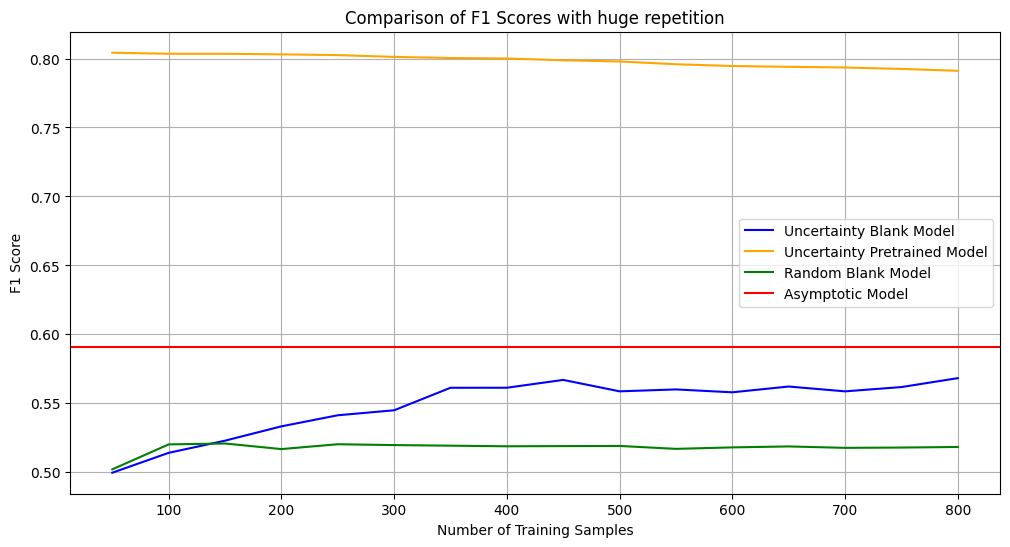

In [31]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB, label='Random Blank Model', color='green')
plt.axhline(y = mf12, color = 'r', linestyle = '-', label='Asymptotic Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with huge repetition')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
step = 50
num_samples = 10000
repeats = 1

f1_scores_UB_repeats2 = []
f1_scores_UP_repeats2 = []
f1_scores_RB_repeats2 = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data2,
        test_df=test_df2,
        pretrain_params=pretrain_params2,
        pretrained_model=pretrained_model2,
        target_col=target_col_name,
        use_bradley=True,
        exp=False,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats2.append(f1_scores_UB)
    f1_scores_UP_repeats2.append(f1_scores_UP)
    f1_scores_RB_repeats2.append(f1_scores_RB)

# Compute the average F1 scores across repeats
average_f1_scores_UB2 = np.mean(f1_scores_UB_repeats2, axis=0)
average_f1_scores_UP2 = np.mean(f1_scores_UP_repeats2, axis=0)
average_f1_scores_RB2 = np.mean(f1_scores_RB_repeats2, axis=0)

Blank model with random pairs: 100%|██████████| 200/200 [01:09<00:00,  2.86it/s]


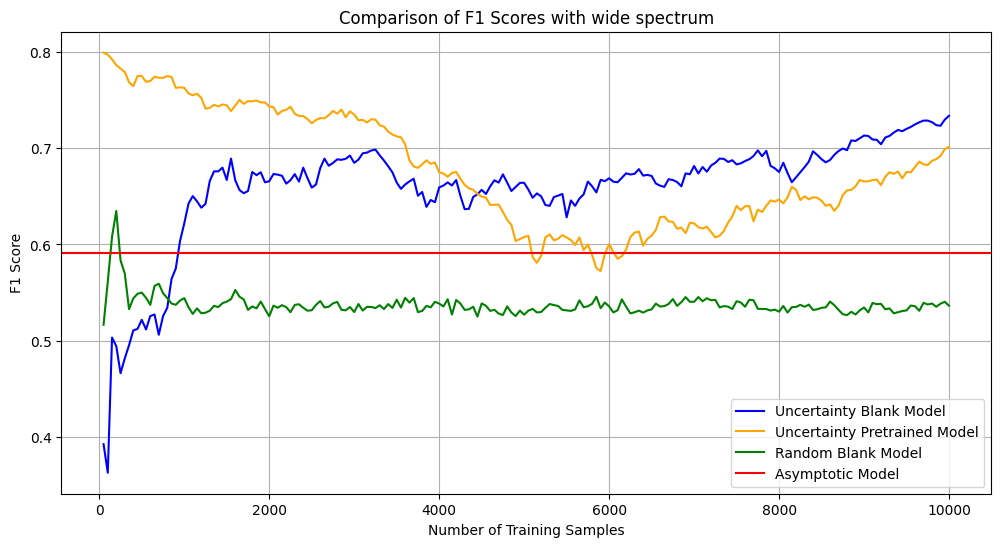

In [33]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB2, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP2, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB2, label='Random Blank Model', color='green')
plt.axhline(y = mf12, color = 'r', linestyle = '-', label='Asymptotic Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with wide spectrum')
plt.legend()
plt.grid(True)
plt.show()